<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

[*********************100%***********************]  1 of 1 completed
Accuracy: 0.9562398703403565


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


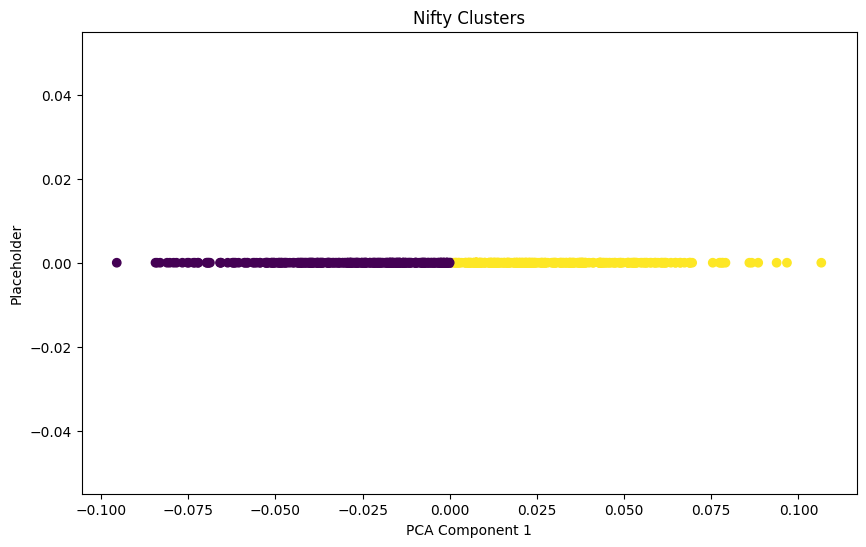

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Download Nifty price data from Yahoo Finance
nifty_data = yf.download('^nsei', start='2021-01-01')

# Step 2: Feature Engineering - Calculate percentage returns
nifty_data['Returns'] = nifty_data['Adj Close'].pct_change(16).fillna(0)
nifty_data['ema50']=nifty_data['Adj Close'].rolling(window=22).mean()

# Step 3: Dimensionality Reduction - Apply PCA
pca = PCA(n_components=1)
features = nifty_data[['Returns']]
reduced_features = pca.fit_transform(features)

# Step 4: Clustering - Apply K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Step 5: Cluster Analysis
nifty_data['Cluster'] = clusters

# Step 6: Predicting Price Changes
nifty_data['Predicted_Returns'] = np.nan
for cluster_label in np.unique(clusters):
    mask = nifty_data['Cluster'] == cluster_label
    avg_return = np.mean(nifty_data[mask]['Returns'])
    nifty_data.loc[mask, 'Predicted_Returns'] = avg_return

# Step 7: Evaluation
nifty_data['Actual_Signal'] = np.where(nifty_data['Returns'] > 0, 1, 0)
nifty_data['Predicted_Signal'] = np.where(nifty_data['Predicted_Returns'] > 0, 1, 0)

accuracy = np.mean(nifty_data['Actual_Signal'] == nifty_data['Predicted_Signal'])

print(f"Accuracy: {accuracy}")

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], np.zeros_like(reduced_features[:, 0]), c=clusters)
plt.title('Nifty Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('Placeholder')
plt.show()



In [4]:
# Step 1: Download Nifty price data from Yahoo Finance
gold_data = yf.download('goldbees.ns', start='2021-01-01')

# Step 2: Feature Engineering - Calculate percentage returns
gold_data['Returns'] = gold_data['Adj Close'].pct_change(16).fillna(0)
gold_data['ema50']=gold_data['Adj Close'].rolling(window=22).mean()

# Step 3: Dimensionality Reduction - Apply PCA
pca = PCA(n_components=1)
features = gold_data[['Returns']]
reduced_features = pca.fit_transform(features)

# Step 4: Clustering - Apply K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_features)

# Step 5: Cluster Analysis
gold_data['Cluster'] = clusters

# Step 6: Predicting Price Changes
gold_data['Predicted_Returns'] = np.nan
for cluster_label in np.unique(clusters):
    mask = gold_data['Cluster'] == cluster_label
    avg_return = np.mean(gold_data[mask]['Returns'])
    gold_data.loc[mask, 'Predicted_Returns'] = avg_return

# Step 7: Evaluation
gold_data['Actual_Signal'] = np.where(gold_data['Returns'] > 0, 1, 0)
gold_data['Predicted_Signal'] = np.where(gold_data['Predicted_Returns'] > 0, 1, 0)


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


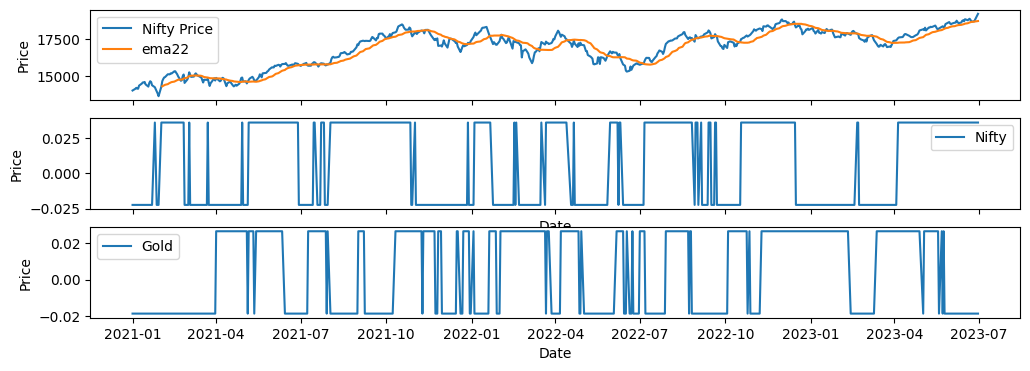

In [8]:
# Plotting Nifty price and Predicted price in separate subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(12,4), sharex=True)

# Nifty Price subplot
ax1.plot(nifty_data.index, nifty_data['Adj Close'], label='Nifty Price')
ax1.plot(nifty_data.index, nifty_data['ema50'], label='ema22')
ax1.set_ylabel('Price')
ax1.legend()

# Predicted Price subplot
ax2.plot(nifty_data.index, nifty_data['Predicted_Returns'], label='Nifty')
#ax3.plot(gold_data.index, gold_data['Predicted_Returns'], label='Gold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')
ax2.legend()

ax3.plot(gold_data.index, gold_data['Predicted_Returns'], label='Gold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Price')
ax3.legend()

plt.show()




In [ ]:
# Plotting the Nifty price with predictions
'''
plt.figure(figsize=(12, 6))
plt.plot(nifty_data.index, nifty_data['Adj Close'], label='Nifty Price')
plt.scatter(nifty_data.index, nifty_data['Adj Close'], c=nifty_data['Predicted_Signal'],
            cmap='coolwarm', edgecolors='black', linewidths=0.5, label='Predicted Signal')
plt.title('Nifty Price with Predicted Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
#plt.show()
'''